In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from itertools import combinations

plt.rcParams['figure.figsize'] = (30,20)
plt.rcParams['font.size'] = 20

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
df = pd.read_csv(r"C:\Users\dnyap\Downloads\AI2\Train_data.csv")
df.head()                 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [4]:
df.shape

(25192, 42)

In [5]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['class'].nunique()

2

In [7]:
df['class'].unique()

array(['normal', 'anomaly'], dtype=object)

In [8]:
df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [9]:
def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)
    
    num=df._get_numeric_data()
    num[num<0]=0
    
    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Columns with zero Variance: ",zero_variance_cols, " are dropped!!")
    print("Shape of the dataframe after removing the zero variance columns: ",df.shape)
    
    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(), "rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)
    
    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)
    
    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)

Dataset Shape:  (25192, 42)
Columns with zero Variance:  ['num_outbound_cmds', 'is_host_login']  are dropped!!
Shape of the dataframe after removing the zero variance columns:  (25192, 40)
0 rows dropped
Shape after Removing NaN:  (25192, 40)
Shape after dropping duplicates:  (25192, 40)
Columns which have identical values:  []  dropped!
Shape after removing identical value columns:  (25192, 40)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [11]:
df.shape

(25192, 40)

In [12]:
df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

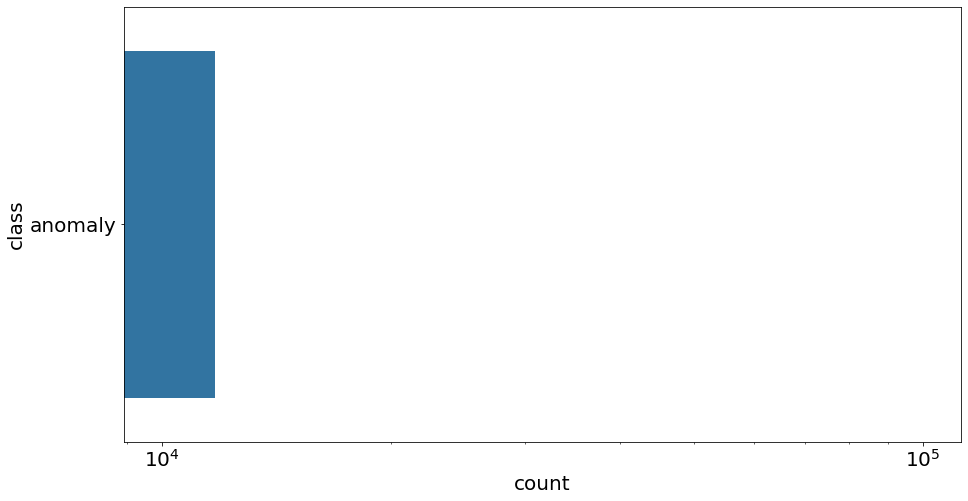

In [13]:
plt.figure(figsize=(15,8))
plot=sns.countplot(data=df['class'],y=df['class'].loc[df['class']!='normal'])
plt.xscale('log')
fig=plot.get_figure()
fig.savefig('attackcount.png')

In [14]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [15]:
#df.loc[df['label']!='BENIGN','label']='ATTACK'
#df.head()

In [16]:
#df.class.value_counts()

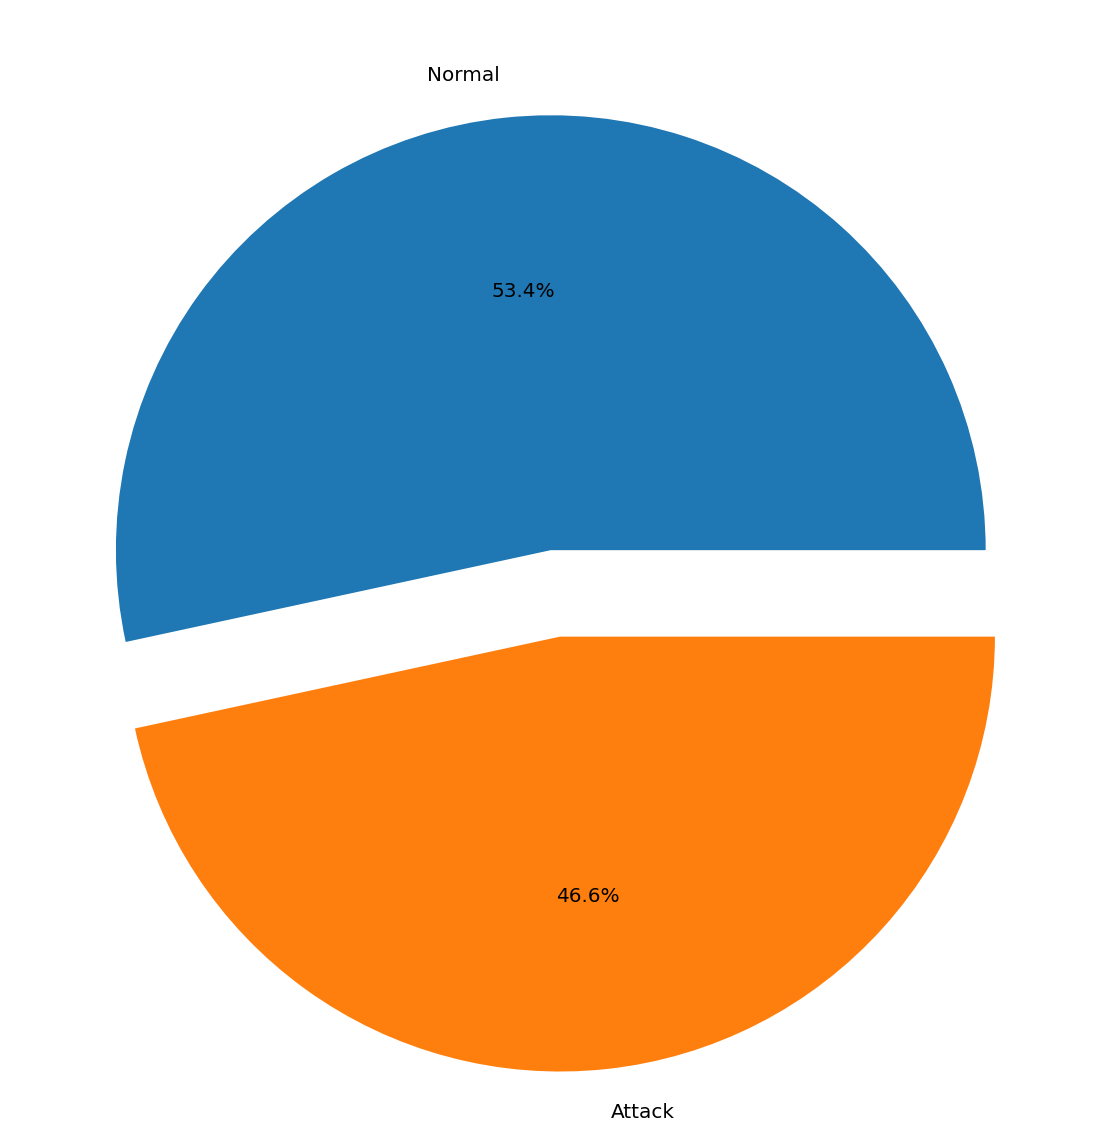

In [17]:
vc = df['class'].value_counts(ascending=False)

plt.pie(x=vc.values, labels=['Normal','Attack'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.show()


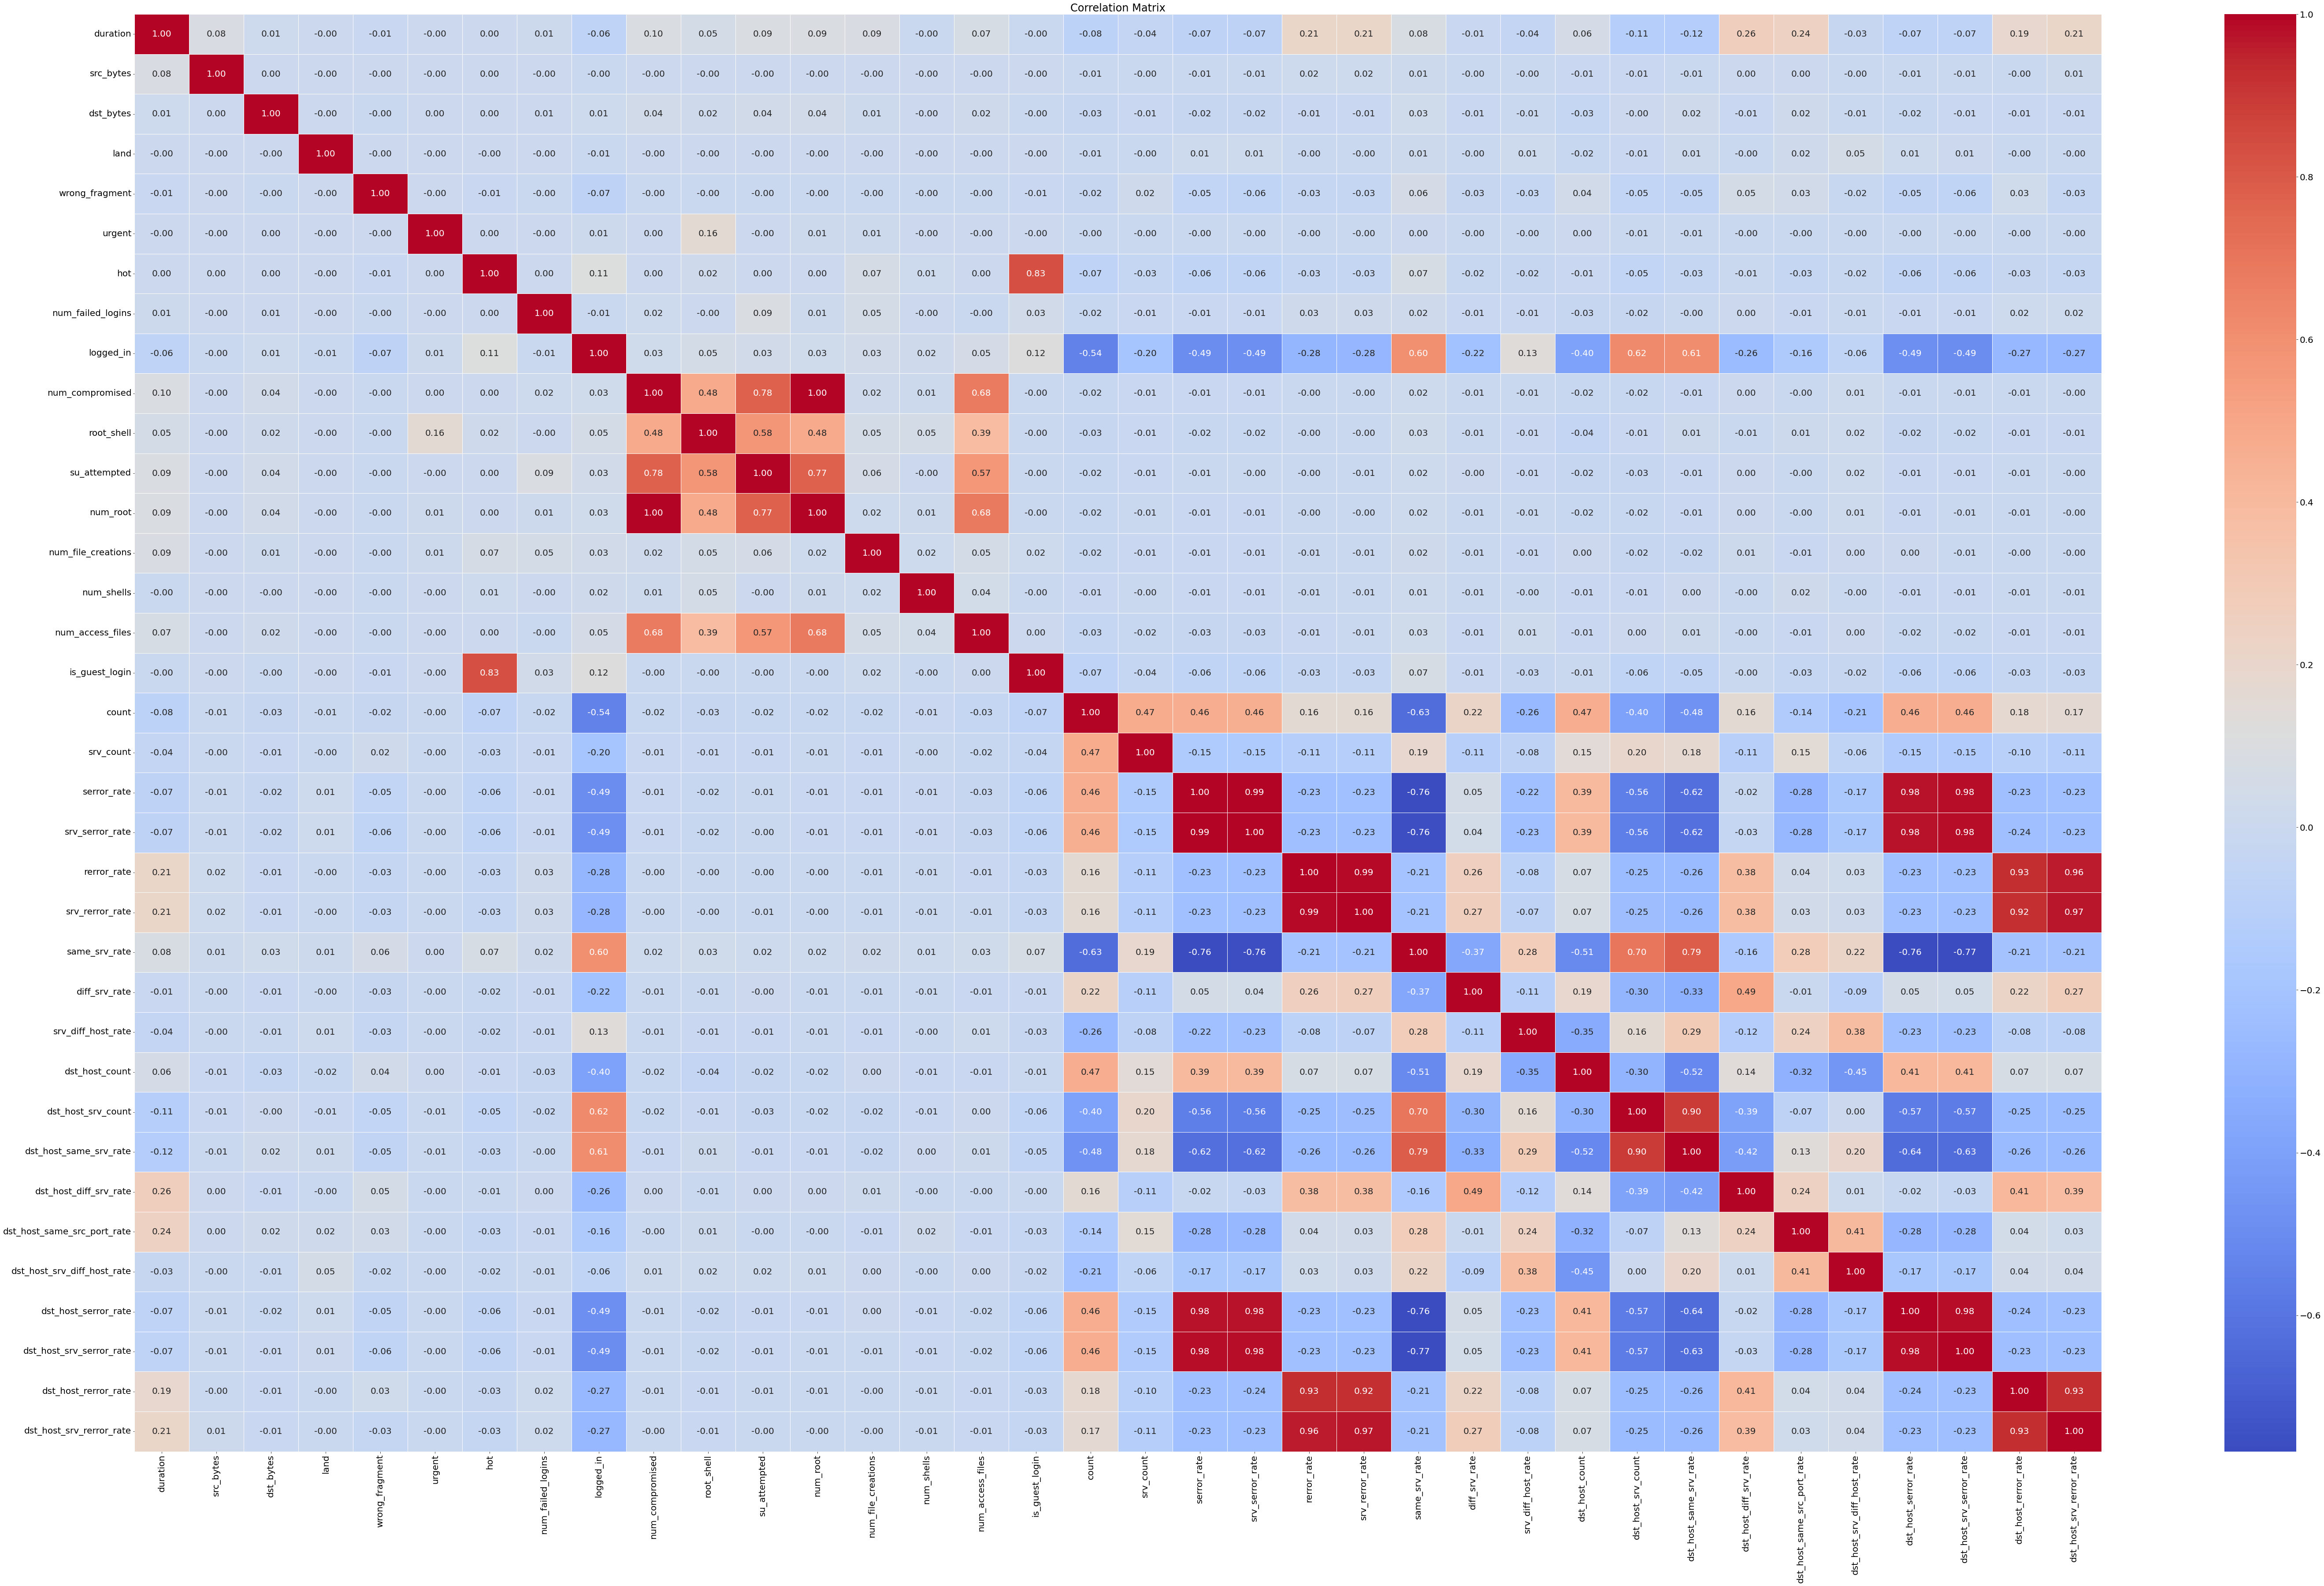

In [18]:
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(100, 60))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Index(['hot', 'num_compromised', 'su_attempted', 'num_root', 'is_guest_login',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')


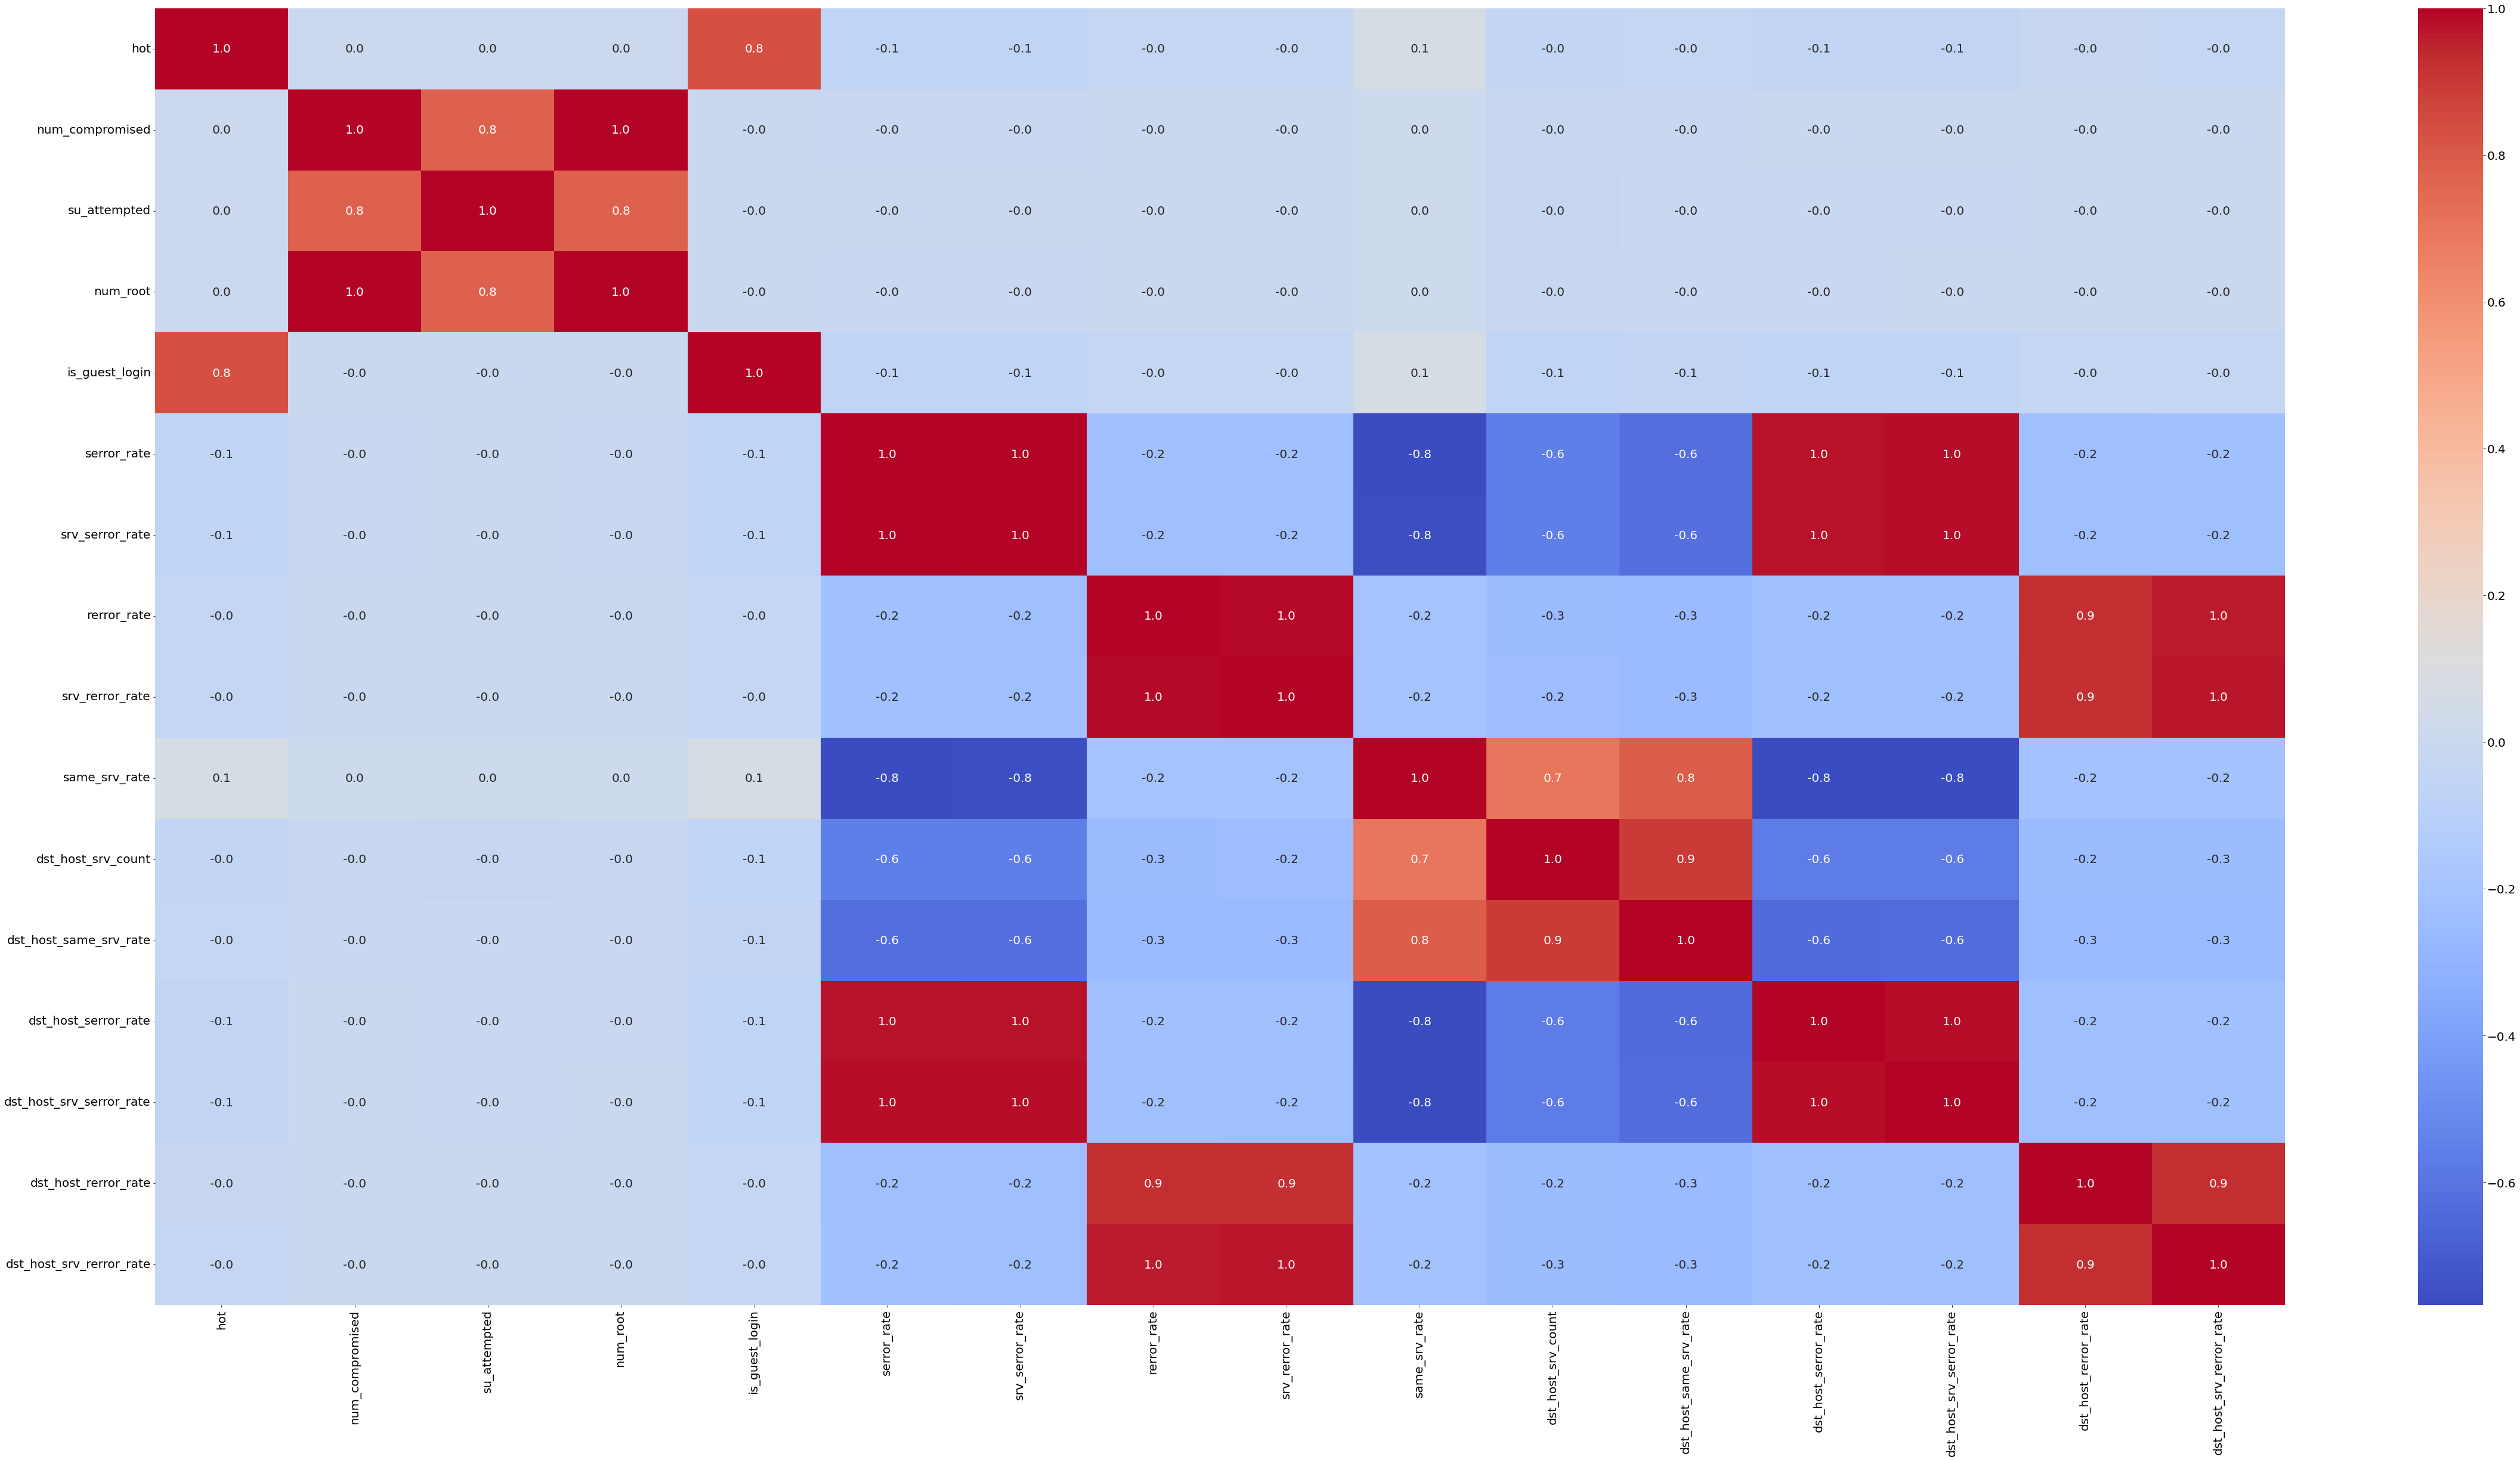

In [19]:
corr_matrix = df.corr()
threshold = 0.75

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)
#filtered_columns=filtered_columns.append("label")
# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print(filtered_columns)
#filtered_columns["label"]=df["label"]
# Plot the heatmap
plt.figure(figsize=(80, 40))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.show()

In [20]:
df1=df[['hot', 'num_compromised', 'su_attempted', 'num_root', 'is_guest_login',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','class']]
df=df1

In [21]:
df.shape

(25192, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25192 entries, 0 to 25191
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hot                       25192 non-null  int64  
 1   num_compromised           25192 non-null  int64  
 2   su_attempted              25192 non-null  int64  
 3   num_root                  25192 non-null  int64  
 4   is_guest_login            25192 non-null  int64  
 5   serror_rate               25192 non-null  float64
 6   srv_serror_rate           25192 non-null  float64
 7   rerror_rate               25192 non-null  float64
 8   srv_rerror_rate           25192 non-null  float64
 9   same_srv_rate             25192 non-null  float64
 10  dst_host_srv_count        25192 non-null  int64  
 11  dst_host_same_srv_rate    25192 non-null  float64
 12  dst_host_serror_rate      25192 non-null  float64
 13  dst_host_srv_serror_rate  25192 non-null  float64
 14  dst_ho

In [23]:
df.head()

,hot,num_compromised,su_attempted,num_root,is_guest_login,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.00,25,0.17,0.00,0.00,0.05,0.00,normal
1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.08,1,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,0,0,0,1.0,1.0,0.0,0.0,0.05,26,0.10,1.00,1.00,0.00,0.00,anomaly
3,0,0,0,0,0,0.2,0.2,0.0,0.0,1.00,255,1.00,0.03,0.01,0.00,0.01,normal
4,0,0,0,0,0,0.0,0.0,0.0,0.0,1.00,255,1.00,0.00,0.00,0.00,0.00,normal


In [24]:
cat_feats = [x for x in df.columns if len(df[x].unique()) <=2]
num_feats = [x for x in df.columns if x not in cat_feats]
cat_feats

['is_guest_login', 'class']

In [25]:
df.loc[df['class']== 'anomaly','class']=1
df.loc[df['class']=='normal','class']=0


In [26]:
ct = make_column_transformer(
    (StandardScaler(), num_feats )
)

df_scaled = pd.DataFrame(ct.fit_transform(df), columns=num_feats)
df_cat_feats = df[cat_feats]

df_concat = pd.concat([df_scaled, df_cat_feats], axis=1)
df_concat.head()

,hot,num_compromised,su_attempted,num_root,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_guest_login,class
0,-0.091933,-0.021873,-0.027665,-0.021724,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,-0.813985,-0.779157,-0.641804,-0.627365,-0.221668,-0.374281,0,0
1,-0.091933,-0.021873,-0.027665,-0.021724,-0.640142,-0.633978,-0.372186,-0.373098,-1.320567,-1.030895,-1.157831,-0.641804,-0.627365,-0.385140,-0.374281,0,0
2,-0.091933,-0.021873,-0.027665,-0.021724,1.595477,1.600209,-0.372186,-0.373098,-1.388806,-0.804947,-0.935081,1.603834,1.614454,-0.385140,-0.374281,0,1
3,-0.091933,-0.021873,-0.027665,-0.021724,-0.193018,-0.187141,-0.372186,-0.373098,0.772109,1.264742,1.069663,-0.574435,-0.604947,-0.385140,-0.342768,0,0
4,-0.091933,-0.021873,-0.027665,-0.021724,-0.640142,-0.633978,-0.372186,-0.373098,0.772109,1.264742,1.069663,-0.641804,-0.627365,-0.385140,-0.374281,0,0


In [27]:
df_concat.isnull().sum()
df_concat=df_concat.dropna()

In [28]:
df_concat.isnull().sum()

hot                         0
num_compromised             0
su_attempted                0
num_root                    0
serror_rate                 0
srv_serror_rate             0
rerror_rate                 0
srv_rerror_rate             0
same_srv_rate               0
dst_host_srv_count          0
dst_host_same_srv_rate      0
dst_host_serror_rate        0
dst_host_srv_serror_rate    0
dst_host_rerror_rate        0
dst_host_srv_rerror_rate    0
is_guest_login              0
class                       0
dtype: int64

In [29]:
X = df_concat.drop(['class'], axis=1)
y = df_concat['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

X_train_genuine = X_train[~y_train]
X_test_genuine = X_test[~y_test]

X_train_fraud = X_train[y_train]
X_test_fraud = X_test[y_test]

In [30]:
CODE_DIM = 2
INPUT_SHAPE = X_train.shape[1]

input_layer = Input(shape=(INPUT_SHAPE,))
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
code = Dense(CODE_DIM, activation='relu')(x)
x = Dense(16, activation='relu')(code)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(INPUT_SHAPE, activation='relu')(x)

autoencoder = Model(input_layer, output_layer, name='anomaly')

In [31]:
model_name = "anomaly.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            save_weights_only=True,
                            verbose=1)
earlystopping = EarlyStopping(monitor='val_loss',
                              min_delta = 0, 
                              patience = 5, 
                              verbose = 1,
                              restore_best_weights=True)

callbacks = [checkpoint, earlystopping]

In [32]:
autoencoder.compile(loss='mae',
                    optimizer=Adam())

In [33]:
history = autoencoder.fit(X_train_genuine, X_train_genuine,
                          epochs=25, batch_size=256,
                          validation_data=(X_test,X_test),
                          callbacks=callbacks, shuffle=True)

Epoch 1/25
32/43 [=====================>........] - ETA: 0s - loss: 0.4614  
Epoch 1: val_loss improved from inf to 0.57987, saving model to anomaly.h5
43/43 [==============================] - 3s 17ms/step - loss: 0.4596 - val_loss: 0.5799
Epoch 2/25
28/43 [==================>...........] - ETA: 0s - loss: 0.4081
Epoch 2: val_loss improved from 0.57987 to 0.54129, saving model to anomaly.h5
43/43 [==============================] - 0s 3ms/step - loss: 0.4017 - val_loss: 0.5413
Epoch 3/25
32/43 [=====================>........] - ETA: 0s - loss: 0.3775
Epoch 3: val_loss improved from 0.54129 to 0.52766, saving model to anomaly.h5
43/43 [==============================] - 0s 3ms/step - loss: 0.3753 - val_loss: 0.5277
Epoch 4/25
26/43 [=================>............] - ETA: 0s - loss: 0.3724
Epoch 4: val_loss improved from 0.52766 to 0.52042, saving model to anomaly.h5
43/43 [==============================] - 0s 3ms/step - loss: 0.3696 - val_loss: 0.5204
Epoch 5/25
37/43 [===================

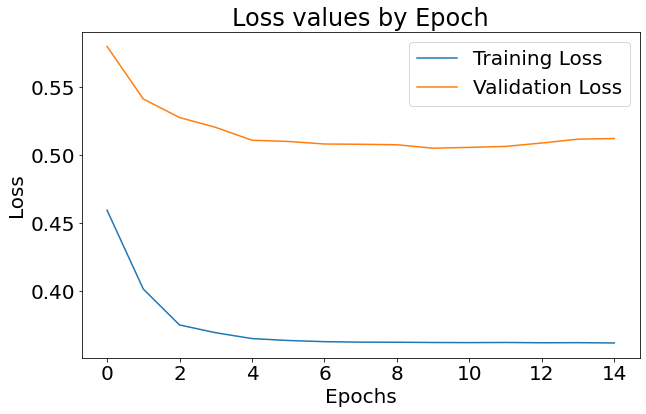

In [34]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()

In [35]:
reconstructions = autoencoder.predict(X_test, verbose=0)
reconstruction_error = mae(reconstructions, X_test)

In [36]:
recons_df = pd.DataFrame({
    'error': reconstruction_error,
    'y_true': y_test
}).reset_index(drop=True)
recons_df.head()

,error,y_true
0,0.710906,True
1,0.283446,False
2,0.725098,True
3,0.360394,False
4,0.342665,False


In [37]:
def thresholdTuning(df, iterations):
    
    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }
    
    for i in range(iterations):
        thresh_value = df['error'].quantile(i/iterations)
        preds = df['error'] > thresh_value
        cr = classification_report(df['y_true'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']
        
        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)
        
        print(f"Threshold: {thresh_value:.4f}\tAccuracy: {acc:.3f}\t\tPrecision: {prec:.3f}\tRecall Score: {rc:.3f}")
        
    return pd.DataFrame(thresh_df)
        
thresh_df = thresholdTuning(recons_df, 10)

Threshold: 0.1979	Accuracy: 0.480		Precision: 0.740	Recall Score: 0.500
Threshold: 0.3008	Accuracy: 0.525		Precision: 0.615	Recall Score: 0.542
Threshold: 0.3350	Accuracy: 0.570		Precision: 0.628	Recall Score: 0.582
Threshold: 0.3427	Accuracy: 0.814		Precision: 0.818	Recall Score: 0.816
Threshold: 0.3427	Accuracy: 0.814		Precision: 0.818	Recall Score: 0.816
Threshold: 0.3644	Accuracy: 0.844		Precision: 0.844	Recall Score: 0.845
Threshold: 0.5518	Accuracy: 0.901		Precision: 0.913	Recall Score: 0.897
Threshold: 0.6868	Accuracy: 0.809		Precision: 0.858	Recall Score: 0.802
Threshold: 0.7541	Accuracy: 0.709		Precision: 0.810	Recall Score: 0.698
Threshold: 0.7673	Accuracy: 0.611		Precision: 0.764	Recall Score: 0.595


In [38]:
threshold = thresh_df[thresh_df['recall'] == thresh_df['recall'].max()]['threshold'].values[0]
print(f"Threshold with Maximum Recall: {threshold:.6f}")

Threshold with Maximum Recall: 0.551766


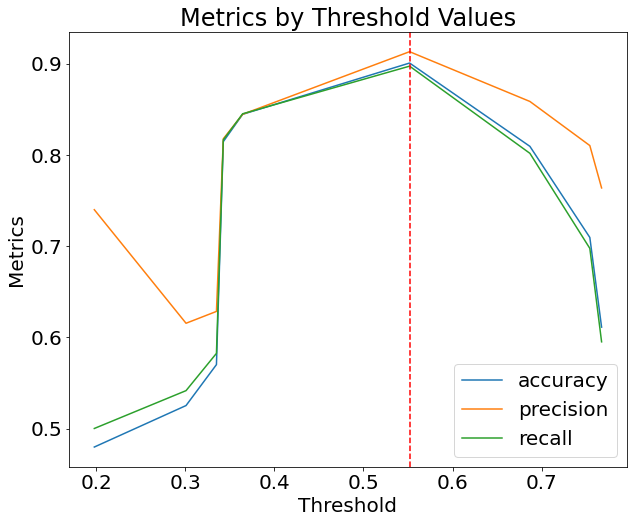

In [39]:
plt.figure(figsize=(10,8))
plt.plot(thresh_df['threshold'], thresh_df['accuracy'], label='accuracy')
plt.plot(thresh_df['threshold'], thresh_df['precision'], label='precision')
plt.plot(thresh_df['threshold'], thresh_df['recall'], label='recall')
plt.axvline(x=threshold, color='r', linestyle='dashed')
plt.xlabel('Threshold')
plt.ylabel('Metrics')
plt.title('Metrics by Threshold Values')
plt.legend()
plt.show()

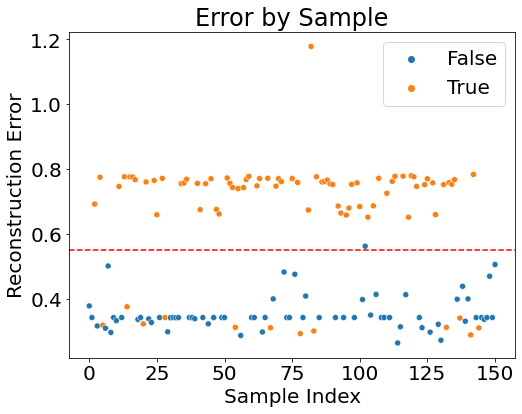

In [40]:
temp = recons_df.sample(frac=0.03, random_state=42).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.scatterplot(data=temp, x=temp.index, y='error', hue='y_true')
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Error by Sample')
plt.legend()
plt.show()

In [41]:
recons_df['y_pred'] = recons_df['error'] > threshold
recons_df.head()

,error,y_true,y_pred
0,0.710906,True,True
1,0.283446,False,False
2,0.725098,True,True
3,0.360394,False,False
4,0.342665,False,False


In [42]:
print(classification_report(recons_df['y_true'],recons_df['y_pred']))

              precision    recall  f1-score   support

       False       0.85      0.98      0.91      2622
        True       0.98      0.81      0.89      2417

    accuracy                           0.90      5039
   macro avg       0.91      0.90      0.90      5039
weighted avg       0.91      0.90      0.90      5039



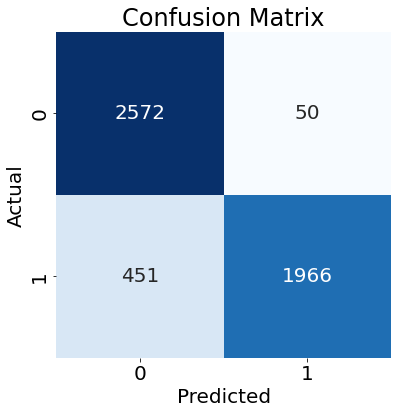

In [43]:
cm = confusion_matrix(recons_df['y_true'],recons_df['y_pred'])
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='.6g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [60]:
print(f"Recall Score: {recall_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")
print(f"Accuracy Score: {accuracy_score(recons_df['y_true'],recons_df['y_pred'])*100:.3f}%")

Recall Score: 81.341%
Accuracy Score: 90.058%


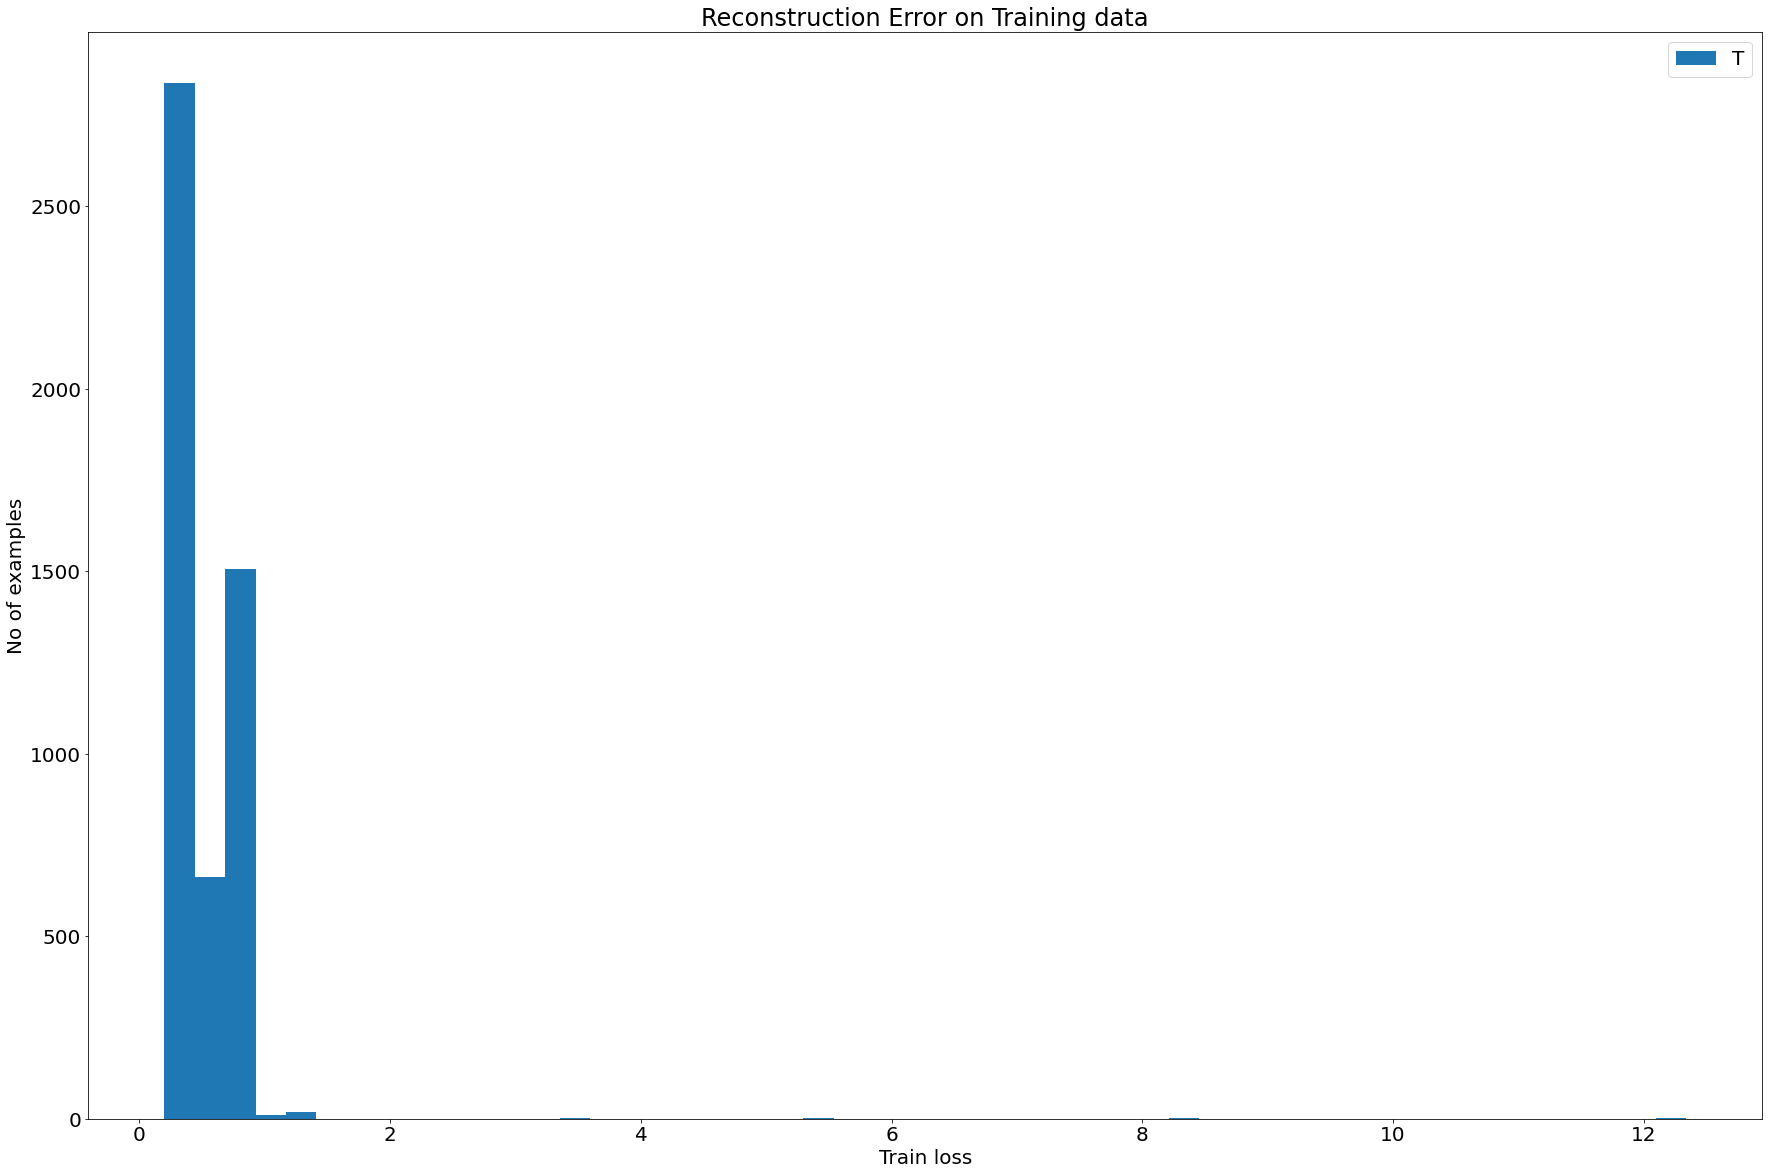

In [59]:
plt.hist(reconstruction_error[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.title("Reconstruction Error on Training data")
plt.legend("Training error")
plt.show()

76/76 [==============================] - 0s 1ms/step


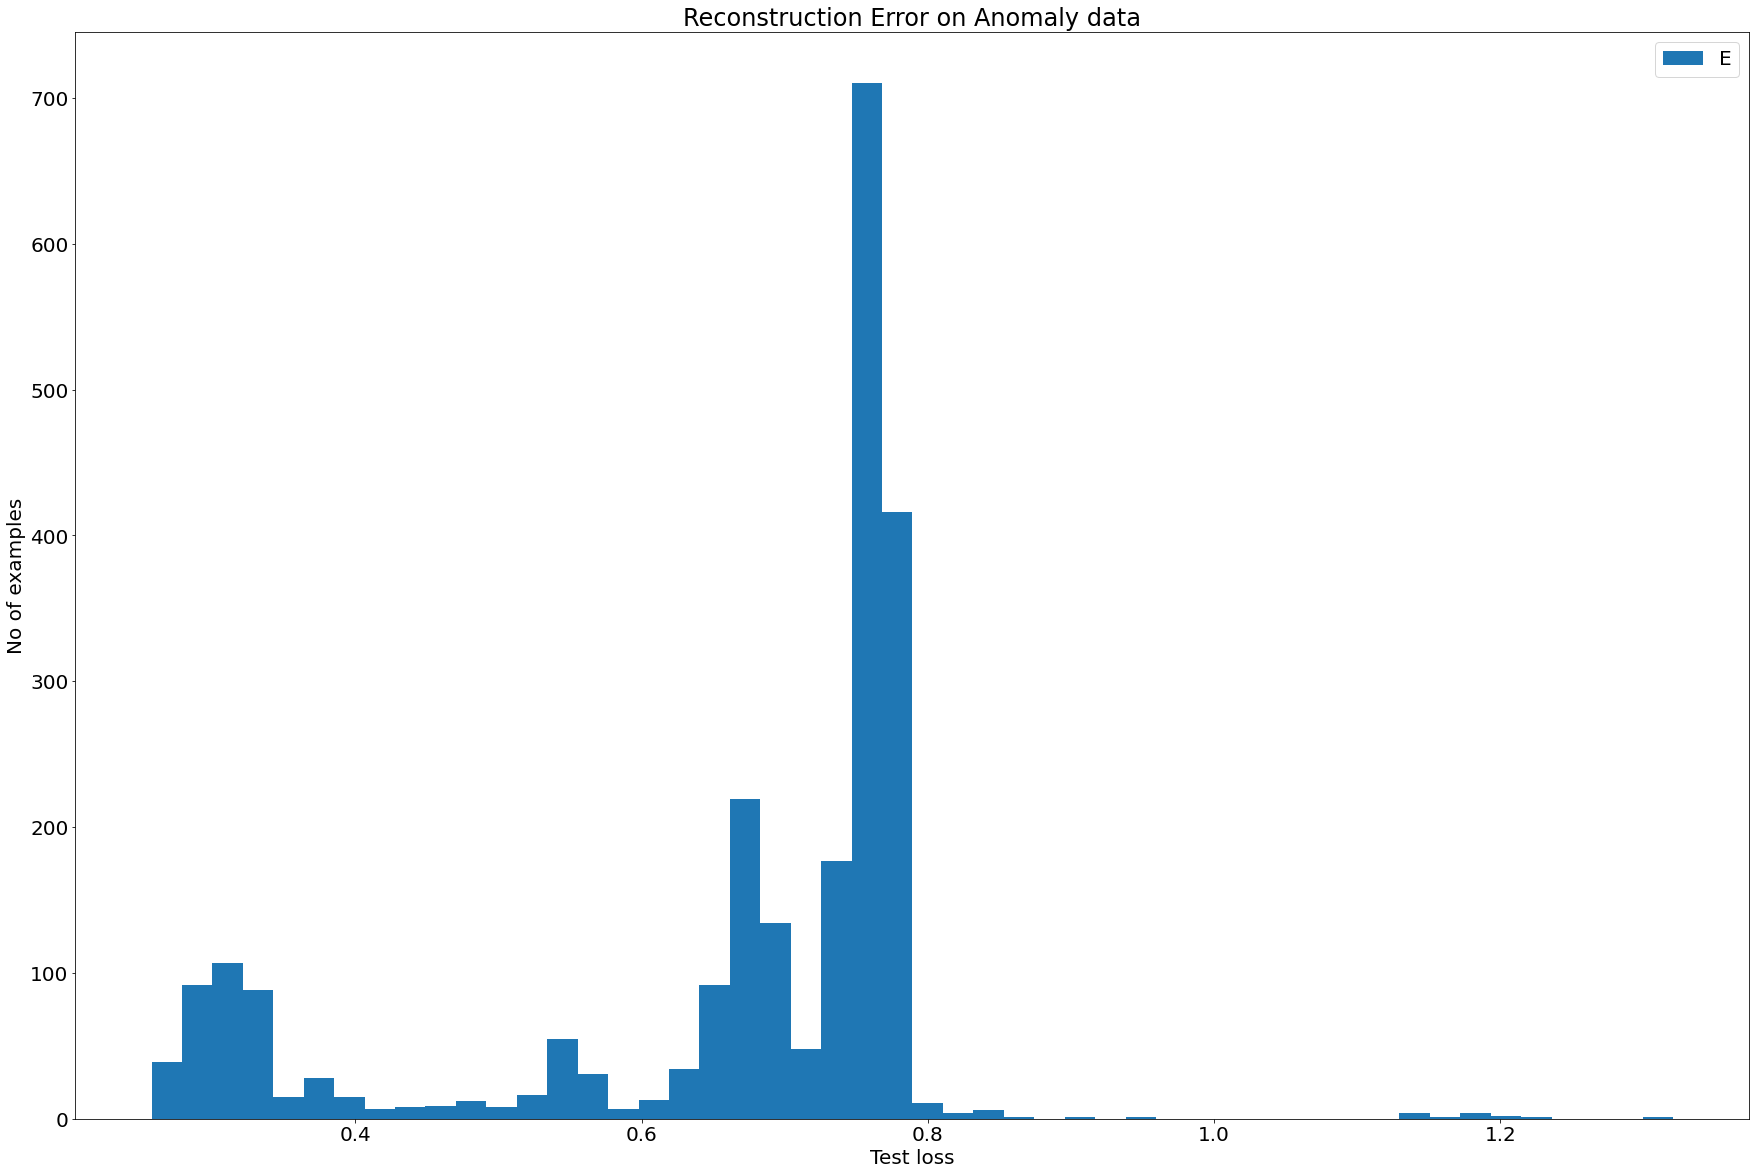

In [54]:
reconstructions = autoencoder.predict(X_test_fraud)
test_loss = tf.keras.losses.mae(reconstructions, X_test_fraud)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.title("Reconstruction Error on Anomaly data")
plt.legend("Error")
plt.show()